
# SWAHILI AUDIO PREDICTION

### Group 4 Members
Nangi Mugira

Collins Kanyiri

Manyara Baraka

Faith Nyawira

Benson Kinyua

Jacinta Mukii


## 1. BUSINESS UNDERSTANDING

### 1.1. Problem Statement
Swahili, also known as Kiswahili, has a rich history that spans centuries and is now one of the most widely spoken languages in Africa, with millions of speakers across various countries. Today, Swahili is not only a language of communication but also a symbol of cultural heritage and identity for millions of people in East Africa and beyond. Its history reflects the dynamic nature of language, shaped by trade, migration, colonization, and cultural exchange over the centuries.

With the increasing availability of digital audio content in Swahili, AnalytiX Insights aims to 
develop automated systems that can classify and categorize Swahili audio recordings for various applications, including speech recognition, content recommendation, and language learning tools. 

### 1.2 Objectives
#### 1.2.1 Main Objective
The objective of this data science project is to build a machine learning model capable of classifying Swahili audio recordings into predefined categories or labels. This model will enable the automated categorization of Swahili audio content, making it easier to organize, search, and retrieve relevant audio resources.

#### 1.2.2 Specific Objectives
 - To develop a machine learning model capable of translating Swahili audio recordings.
 - Create a scalable and efficient system for real-time or batch audio classification.
 - To provide recommendations for further enhancements and applications.


### 1.3 Key Challenges

Data Collection: Acquiring a diverse and representative dataset of Swahili audio recordings spanning different categories and accents.
Feature Extraction: Identifying relevant audio features or representations that capture the essence of Swahili speech.
Model Generalization: Building a model that can generalize well across various accents, dialects, and speaking styles within Swahili.
Real-time Processing: Designing the system for real-time or near-real-time audio classification, depending on the application.

### 1.4 Scope

This project will focus on the development of a machine learning model for Swahili audio classification. It will involve data collection, preprocessing, feature extraction, model training, and evaluation. The model will be designed to classify audio recordings into respective English words.


## 2. IMPORTING LIBRARIES

In [1]:
# Import libraries
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
import librosa
import librosa.display
import os
import shutil
import random
import numpy as np
from tqdm.notebook import tqdm
import noisereduce as nr
import sklearn.preprocessing

In [2]:
# Set seed
np.random.seed(2022)

## 2. DATA COLLECTION

In [3]:
# Load files
train = pd.read_csv('Data/Train.csv')
test = pd.read_csv('Data/Test.csv')

# Unzip audio zip file
shutil.unpack_archive('Data/Swahili_words.zip', 'Swahili_words')

In [4]:
# Preview train set
train.head()

Word_id Swahili_word English_translation
0  id_v8rz06e6rv31.wav        mbili                 two
1  id_vmbwicdpfn68.wav         tatu               three
2  id_injlouhxg1hg.wav         ndio                 yes
3  id_gdq23p6xgzya.wav          nne                four
4  id_lpstklz51zpz.wav         nane               eight

In [5]:
# Preview test set
display(test.head(), train.shape, test.shape)

Word_id
0  id_jp2pxl0r84ya.wav
1  id_ndduqqvthbpx.wav
2  id_36oxymxfcm6q.wav
3  id_ue9b0to760pg.wav
4  id_prja4oprb914.wav

(4200, 3)

(1800, 1)

In [6]:
# Target distribution
train.Swahili_word.value_counts()

Swahili_word
mbili     350
tatu      350
ndio      350
nne       350
nane      350
hapana    350
sita      350
tisa      350
moja      350
saba      350
tano      350
kumi      350
Name: count, dtype: int64

In [7]:
# Sample some words
for word in random.sample(train.Swahili_word.unique().tolist(), 6):
  sample = train[train.Swahili_word == word].Word_id.sample(1).values[0]
  display(word, sample, ipd.Audio('Swahili_words/'+ sample ))

'nne'

'id_xfdecdyhtewt.wav'

'tisa'

'id_gwbhk86pkqgl.wav'

'ndio'

'id_h70v1upj83zl.wav'

'nane'

'id_eaor27mf31c1.wav'

'saba'

'id_htc6xgkh7j3w.wav'

'tatu'

'id_w1ynpw586mjj.wav'

## 3. DATA CLEANING

1. **Load Audio Files:** It can load multiple audio files from a specified folder, allowing you to work with a collection of audio recordings.

2. **Visualize Audio Waveforms:** It visualizes the waveform of each loaded audio file using Matplotlib, which helps you inspect the raw audio data.

3. **Resample Audio:** It resamples the audio to a specified target sampling rate if the native sampling rate of the audio files differs from the target rate. This can be important when you need audio data to be at a consistent sampling rate.

4. **Optional Noise Reduction:** Although this code includes a placeholder for noise reduction using the `noisereduce` library, you can replace it with your own noise reduction techniques if needed. Noise reduction is particularly useful when dealing with audio recordings that contain background noise.

5. **Normalization:** It normalizes the audio data to ensure that it falls within a common range, typically between -1 and 1. Normalization can help make the audio data more suitable for analysis or modeling.

6. **Error Handling:** The code includes error handling to handle exceptions that may occur during audio processing, ensuring that the script doesn't crash if there are issues with specific audio files.

Found 6000 files


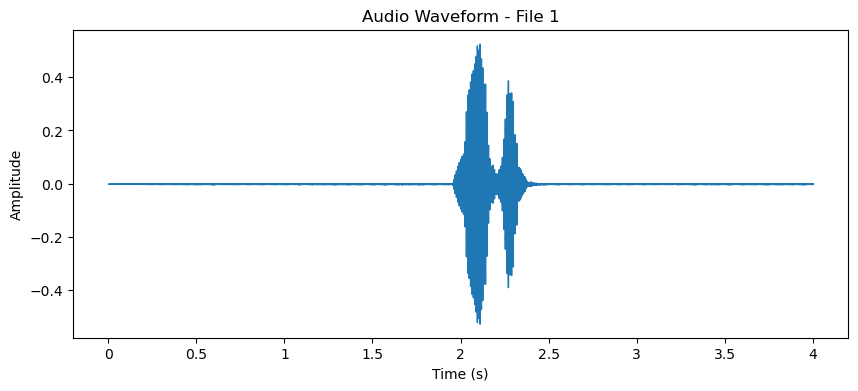

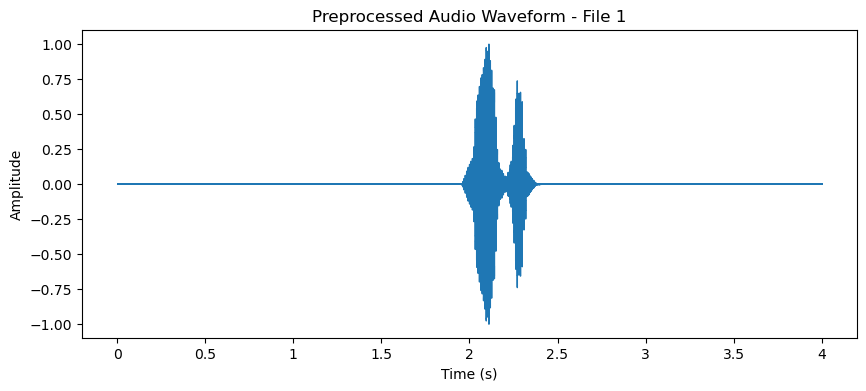

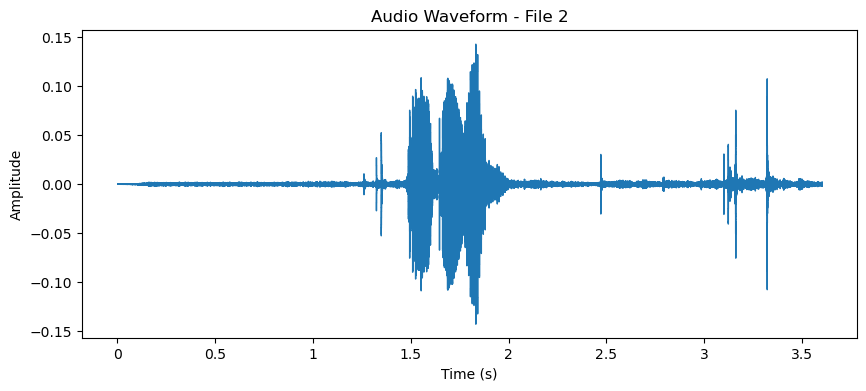

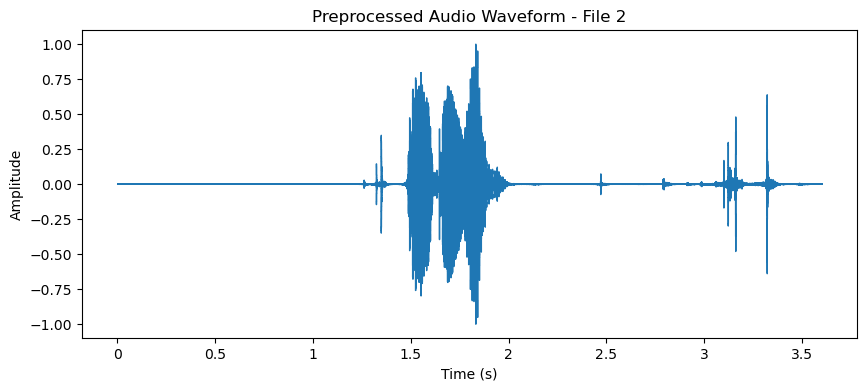

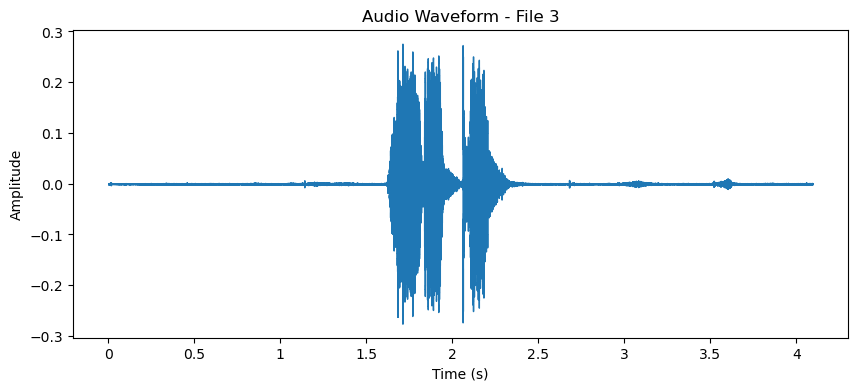

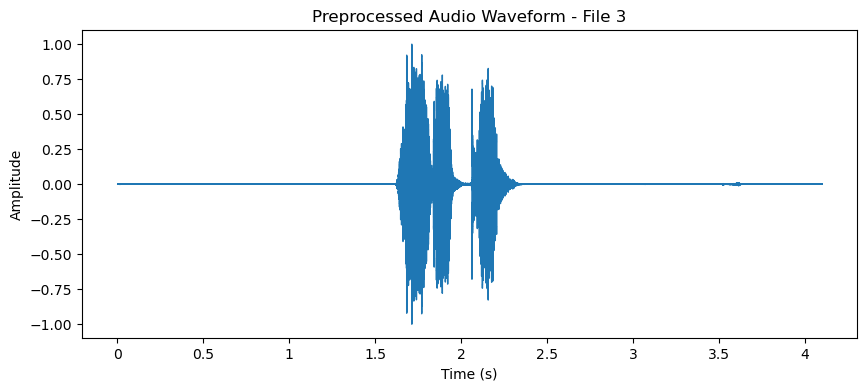

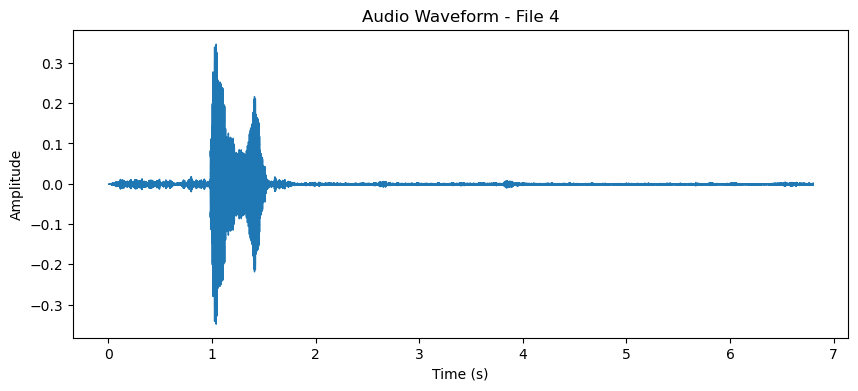

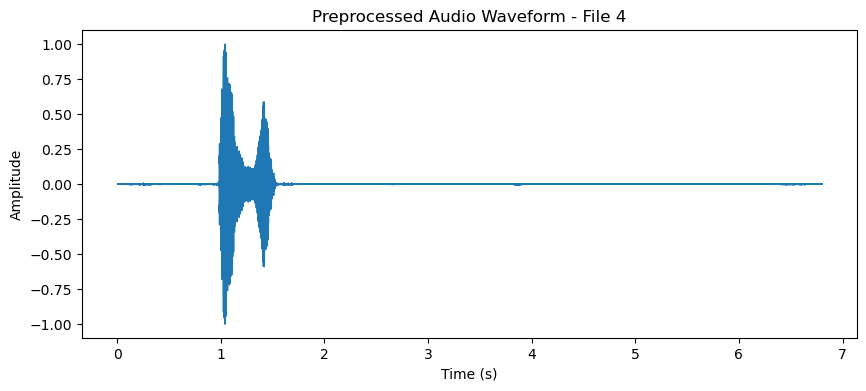

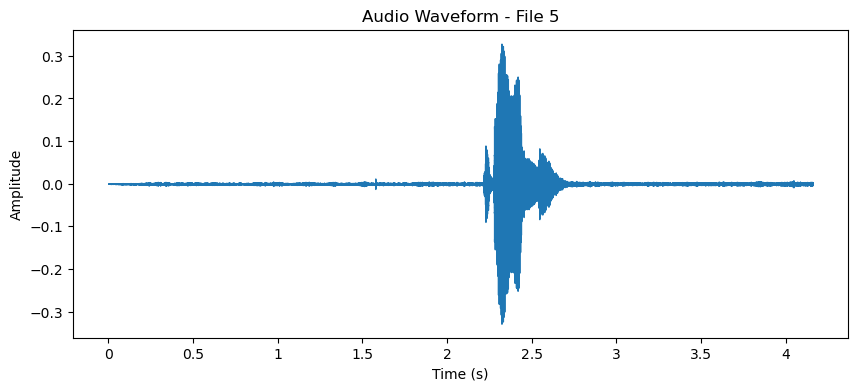

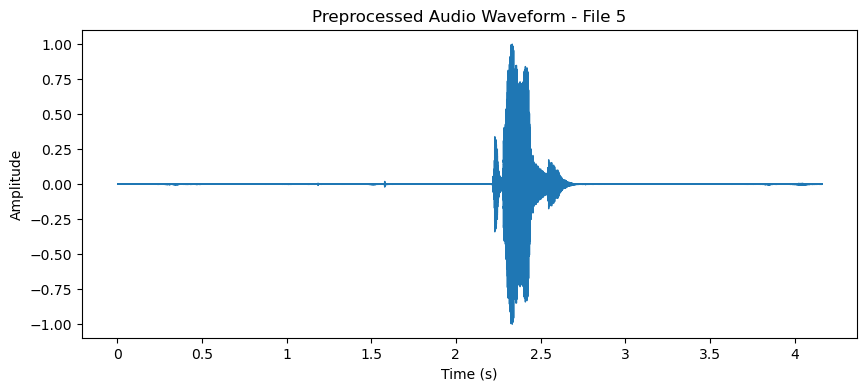

In [8]:
# Load the dummy audio files
data_folder = r'Swahili_words'
audio_files = [os.path.join(data_folder, filename) for filename in os.listdir(data_folder)]  # get list of audio files
audio_files = [audio_file for audio_file in audio_files if audio_file.endswith('.wav')]  # filter out non-audio files
print(f'Found {len(audio_files)} files')  # print the number of files

# Limit the number of visualizations to 5
num_visualizations = 5
for i, audio_file in enumerate(audio_files[:num_visualizations]):
    try:
        y, sr = librosa.load(audio_file, sr=None)  # Load the audio file with its native sampling rate

        # Visualize the audio waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Audio Waveform - File {i + 1}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()

        # Preprocessing steps
        target_sr = 16000  # Target sampling rate (e.g., 16 kHz)
        if sr != target_sr:
            y = librosa.resample(y, sr, target_sr)
            sr = target_sr

        # 2. Noise reduction (optional):
        # You can apply noise reduction techniques if the audio has background noise.
        y= nr.reduce_noise(y, sr=sr)
        
    
        # Example: y = some_noise_reduction_function(y)

        # 3. Normalization:
        # Normalize the audio to a common range, usually between -1 and 1.
        y = librosa.util.normalize(y)

        # 4. Plot the preprocessed audio waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Preprocessed Audio Waveform - File {i + 1}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()

    except Exception as e:
        print(f"Error processing file: {audio_file}")
        print(e)

## 4. EXPLORATION DATA ANALYSIS

In [9]:
# Create a dictionary to check the audio files with the same transcription 
# Get three sample
dict_samples=dict()
for word in train['Swahili_word'].unique().tolist():
    sample = train[train['Swahili_word'] == word]['Word_id'].sample(3).values[:]
    dict_samples[word] = sample

In [10]:
dict_samples

{'mbili': array(['id_5rlc5o5n1s1b.wav', 'id_htx9vb45vk8h.wav',
        'id_cjhhxujadkd1.wav'], dtype=object),
 'tatu': array(['id_5aly5y4f0ihq.wav', 'id_gdhnpb9tk6ju.wav',
        'id_02yh4h2au53z.wav'], dtype=object),
 'ndio': array(['id_uy4dyk2y8itg.wav', 'id_1uh1rjrqhoxs.wav',
        'id_q8ublattuf6h.wav'], dtype=object),
 'nne': array(['id_nmwysb9aih92.wav', 'id_1pca3ef7fyf6.wav',
        'id_z4bsgktw3vgy.wav'], dtype=object),
 'nane': array(['id_31s05g5prv7n.wav', 'id_no8u2tvobi1m.wav',
        'id_6onfy14u6ztv.wav'], dtype=object),
 'hapana': array(['id_j4u9jxt3qows.wav', 'id_69xkivr12erg.wav',
        'id_2e06s8yxz1m4.wav'], dtype=object),
 'sita': array(['id_uegn3hwrd2eo.wav', 'id_0r7awrawc36d.wav',
        'id_t4xbvwqx3qdu.wav'], dtype=object),
 'tisa': array(['id_kbykqygrrlc1.wav', 'id_g7gt7q60x9fx.wav',
        'id_bo3voxkx4890.wav'], dtype=object),
 'moja': array(['id_syxtdgknf2me.wav', 'id_tsumlqgjrphf.wav',
        'id_m9784h87c2ce.wav'], dtype=object),
 'saba': array(['

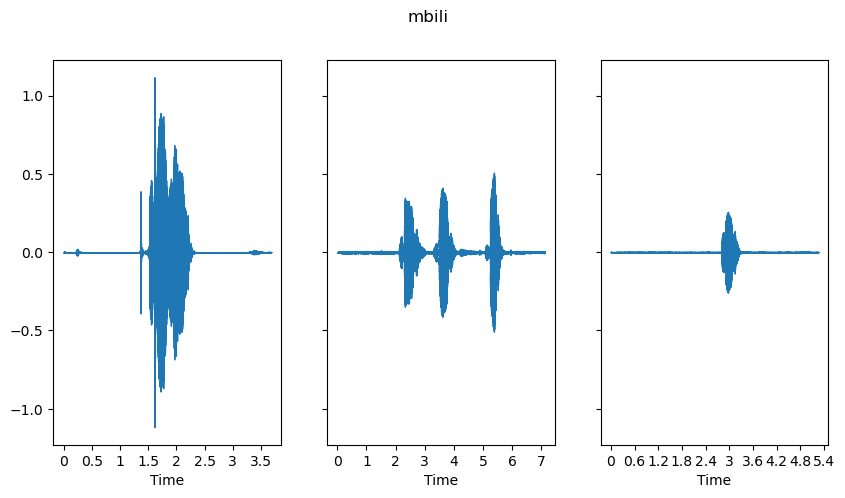

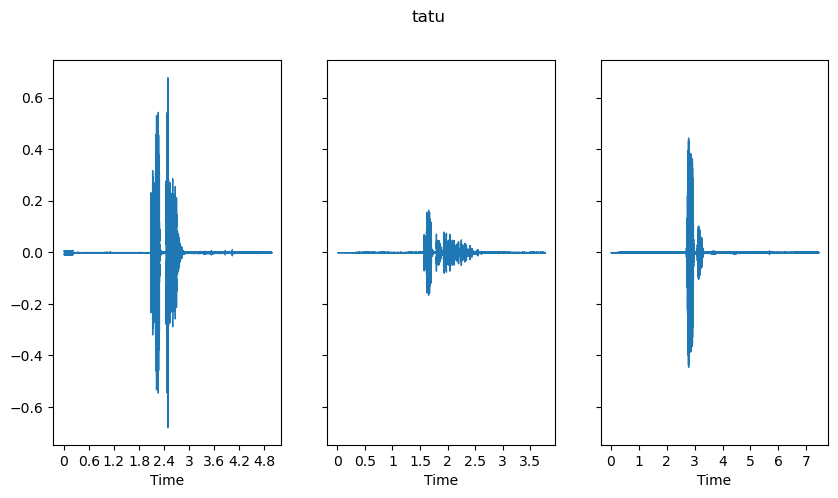

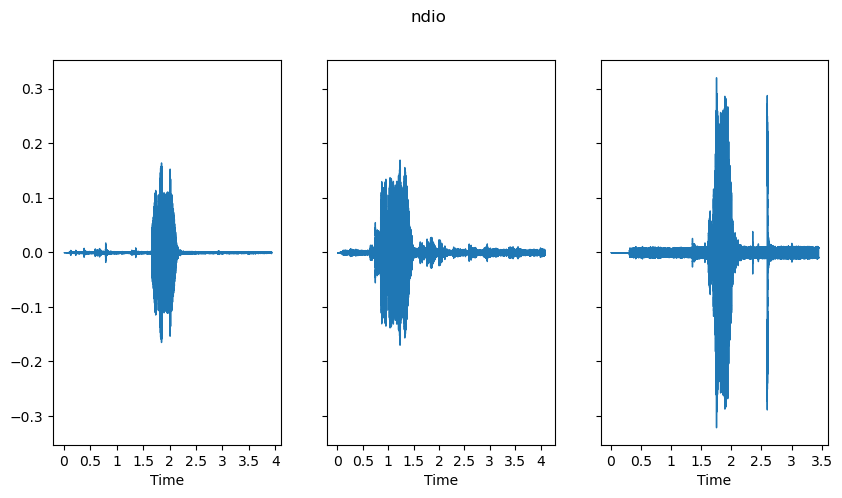

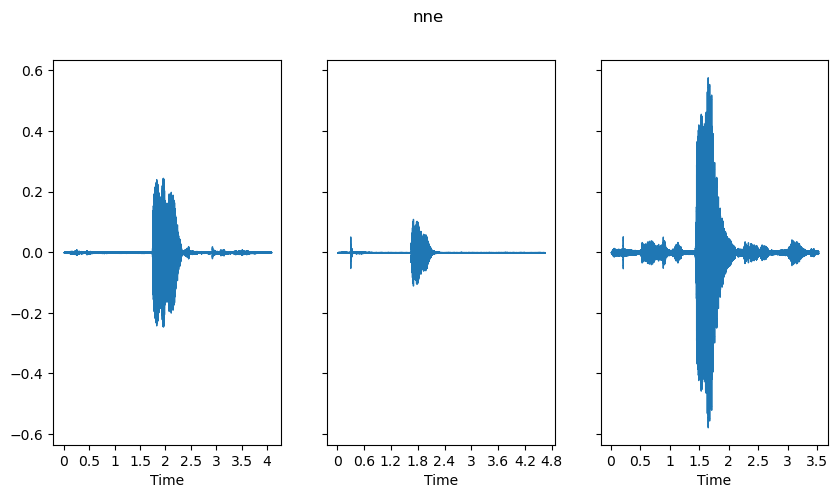

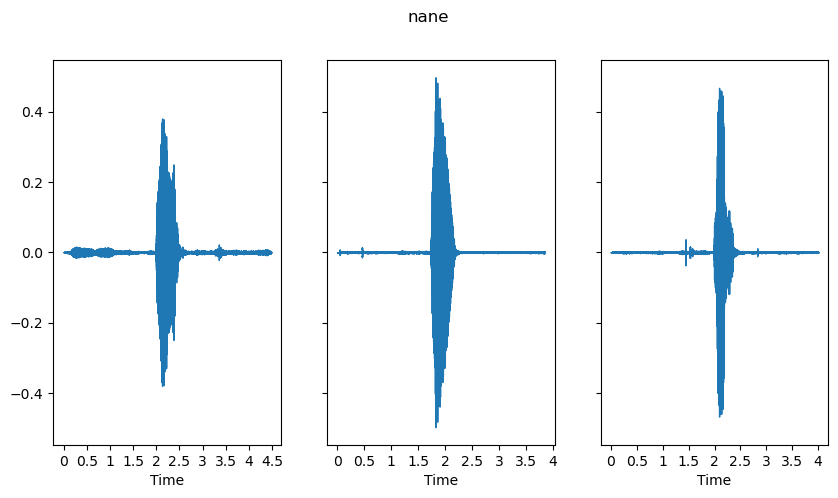

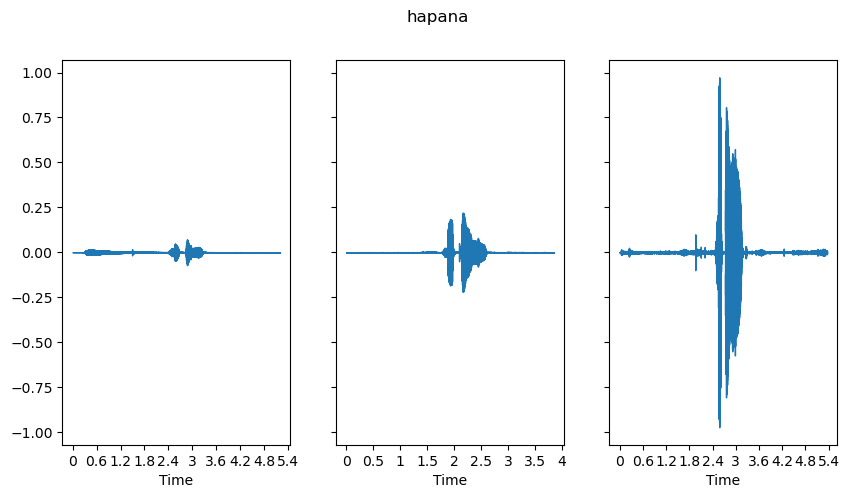

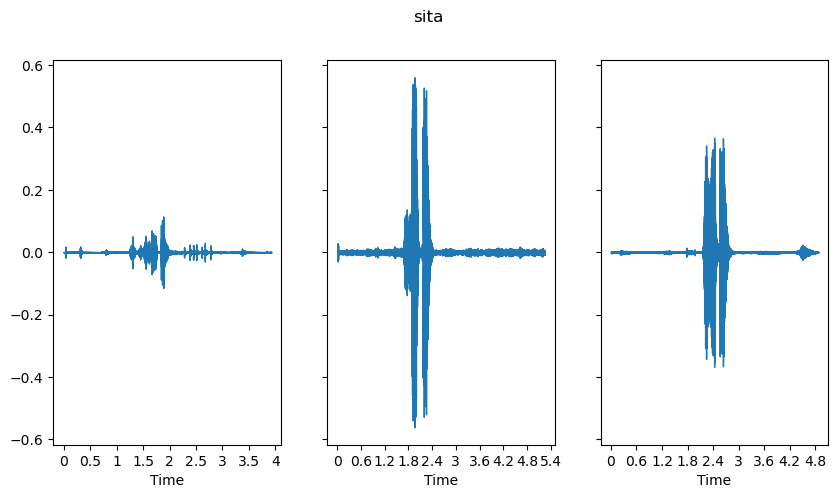

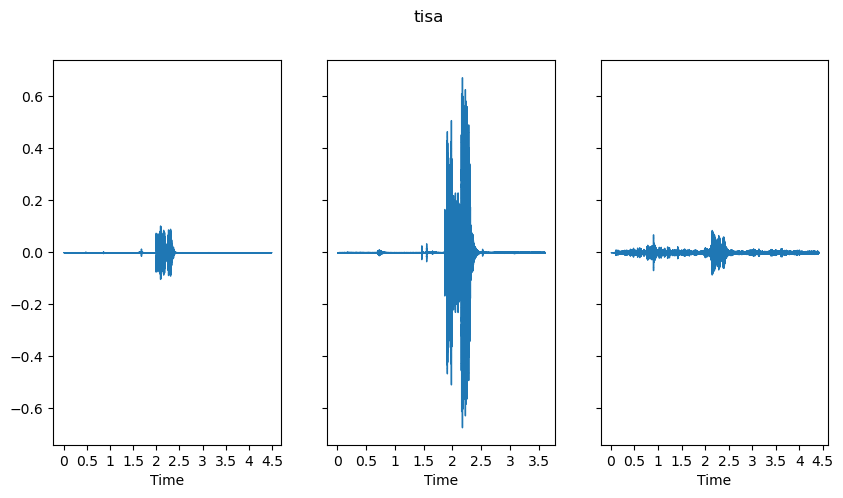

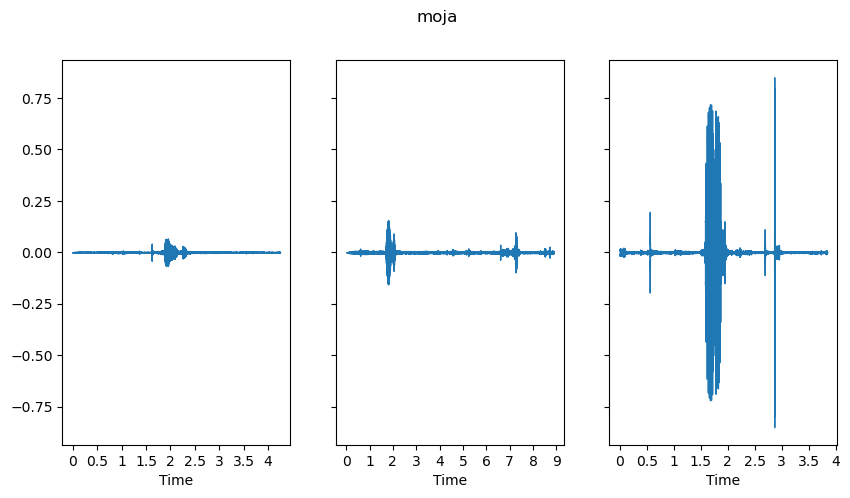

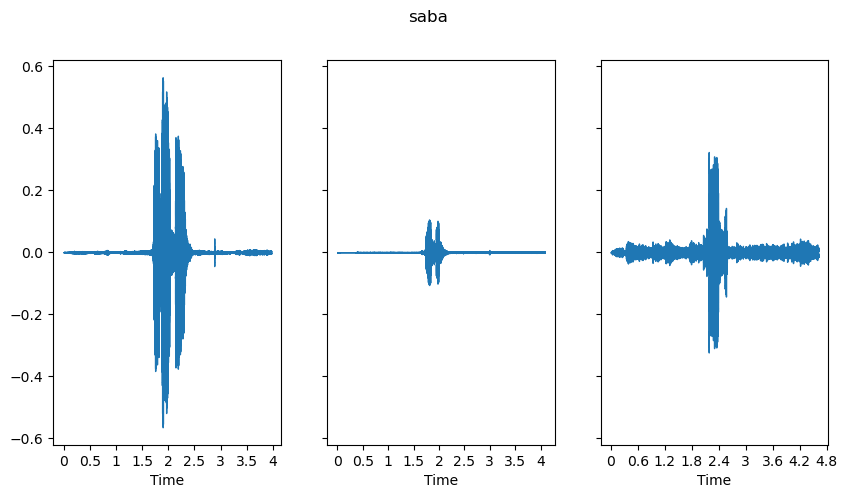

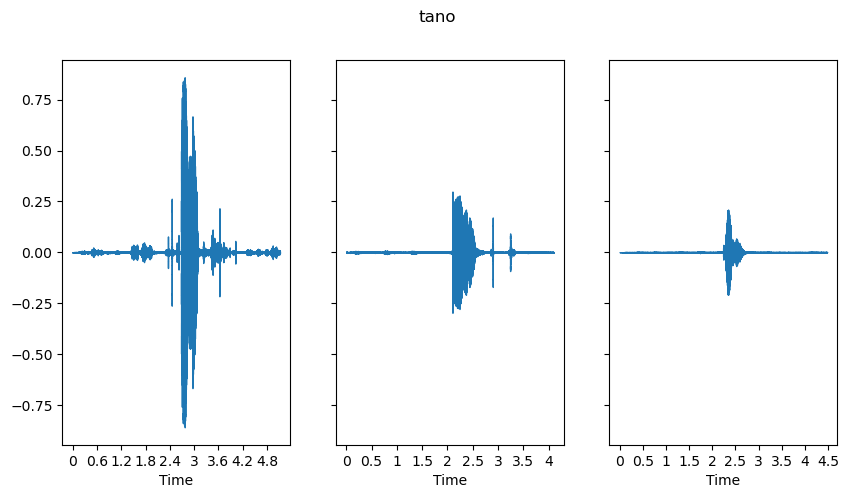

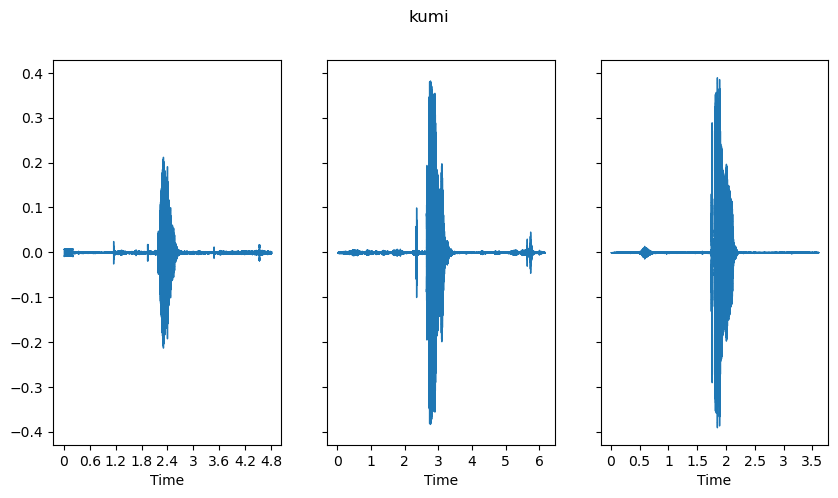

In [11]:
# show three wavefiles for all words in time domain, for easy comparison between the words
for word in dict_samples:
    i=0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('Swahili_words/'+audiofile)
        img = librosa.display.waveshow(x, sr=sr, ax=ax[i])
        i+=1

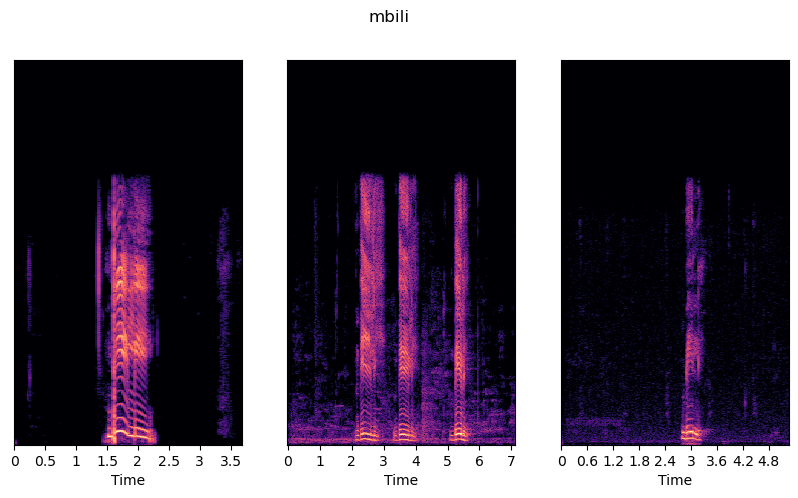

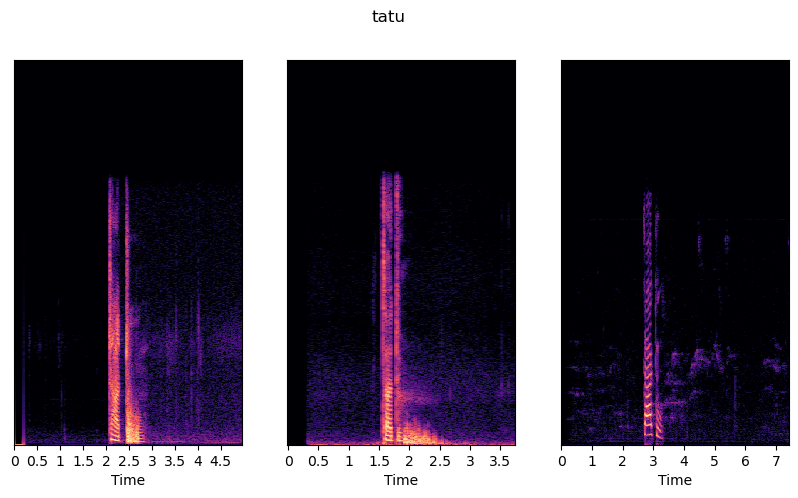

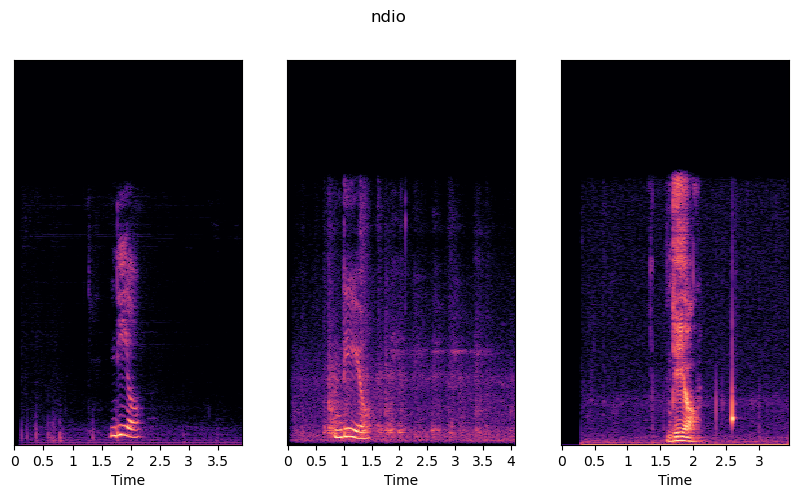

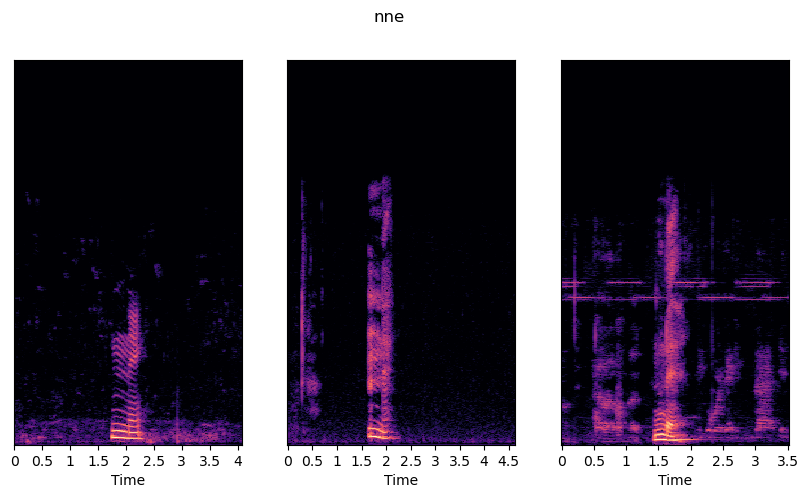

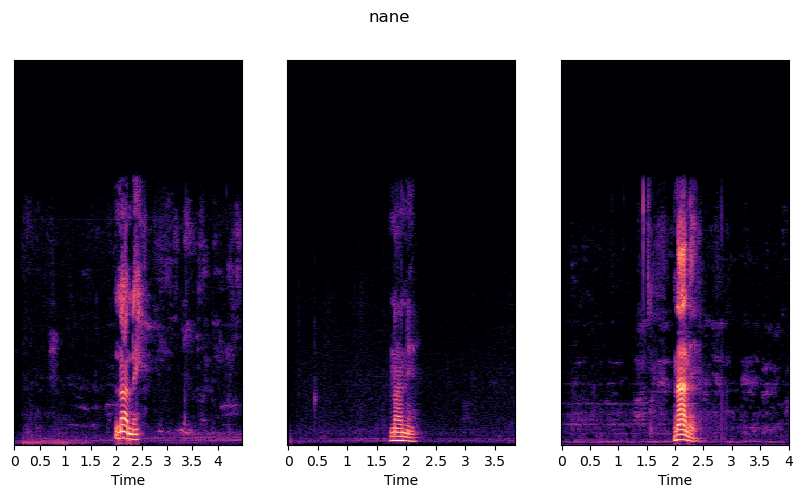

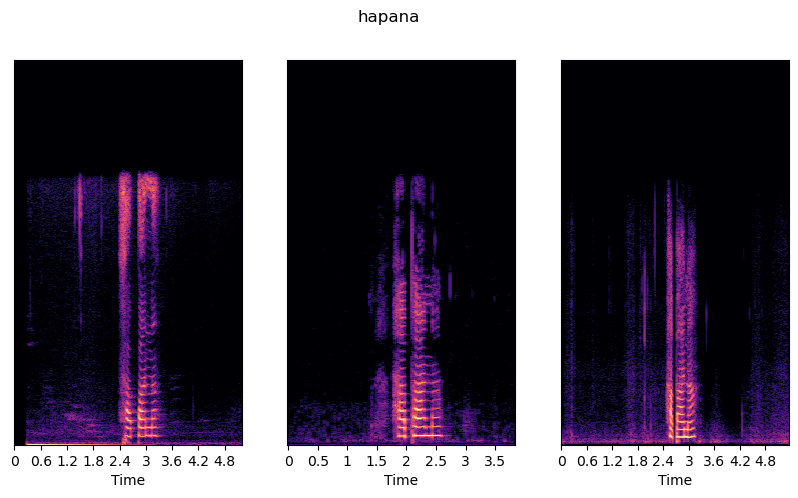

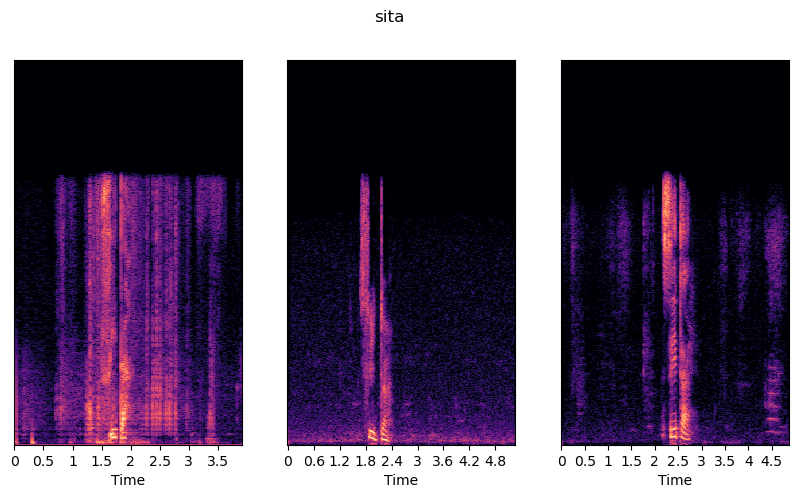

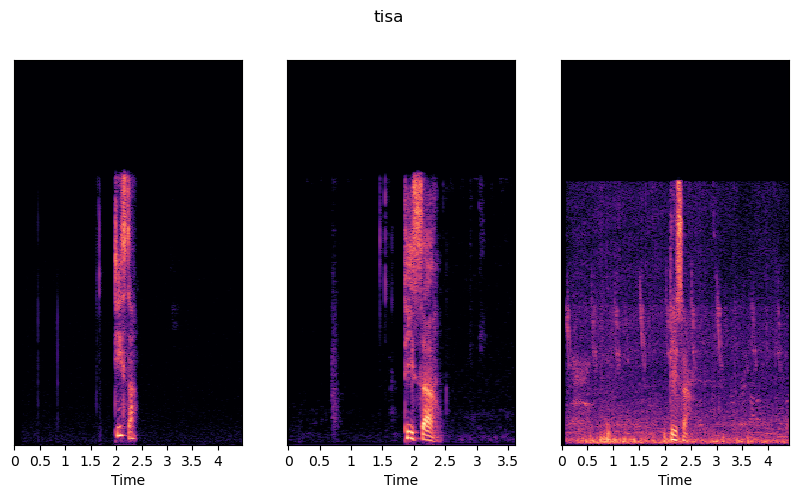

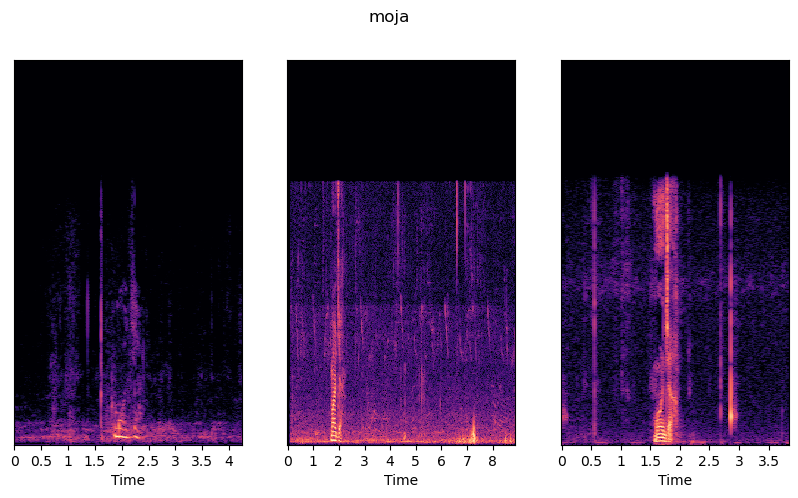

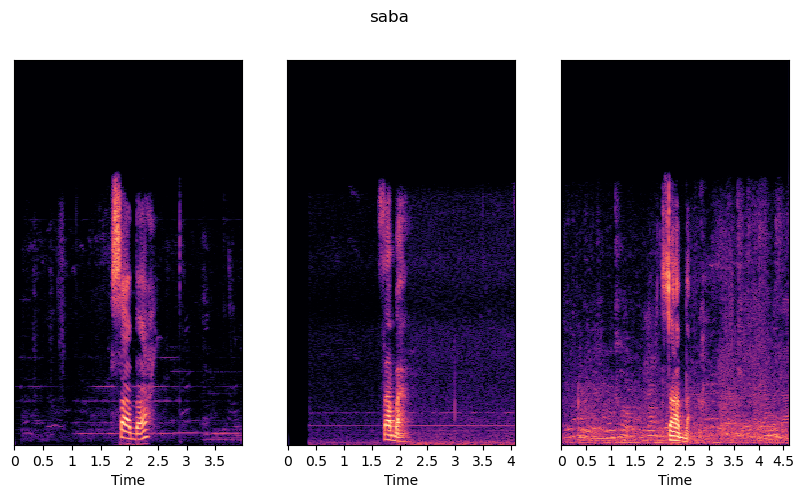

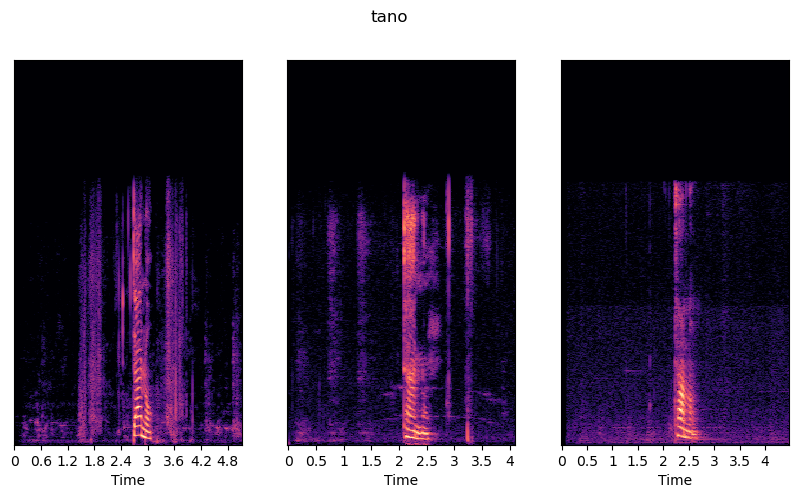

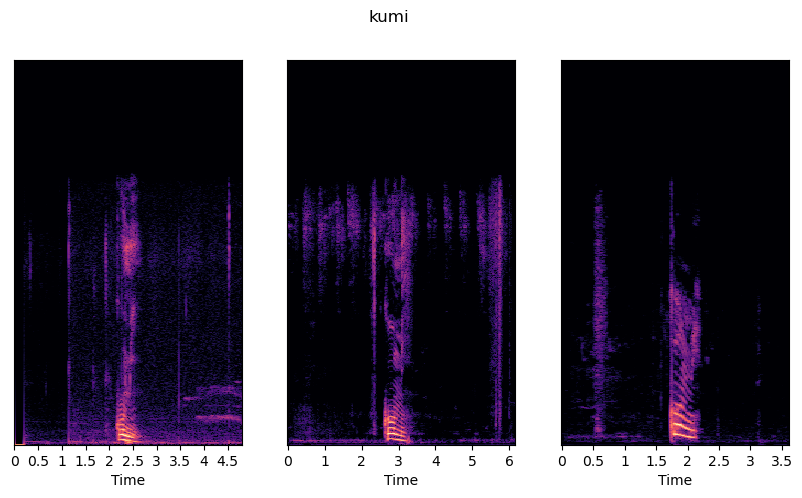

In [12]:
# show the three files of each word in frequency domain
for word in dict_samples:
    i=0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('Swahili_words/'+audiofile)
        X = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
        img = librosa.display.specshow(X, x_axis='time', sr=sr, ax=ax[i])
        i+=1